In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from aesim.simba import JsonProjectRepository

# EMI Analysis and Filter Design for a Buck Converter

This example performs EMI analysis without and with EMI filter.

1. The first section leads to extract Common mode, Differential mode and Total EMI noises and display thoses noises in both Time and Frequency domain without any EMI filter.

2. The second section allows also to extract Common mode, Differential mode and Total EMI noises and still display thoses noises on both Time and Frequency domain with an EMI filter.

**Section 1: EMI analysis without EMI filter**

Load SIMBA File without Filter and run
========== 0 Error(s), 0 Warning(s) ==========
Job duration: 37,920472 seconds.

Extracting CM, DM & EMI noises
Perform FFT Calculations
Plot EMI Noise without filter


Text(0.5, 1.0, 'Frequency Domain')

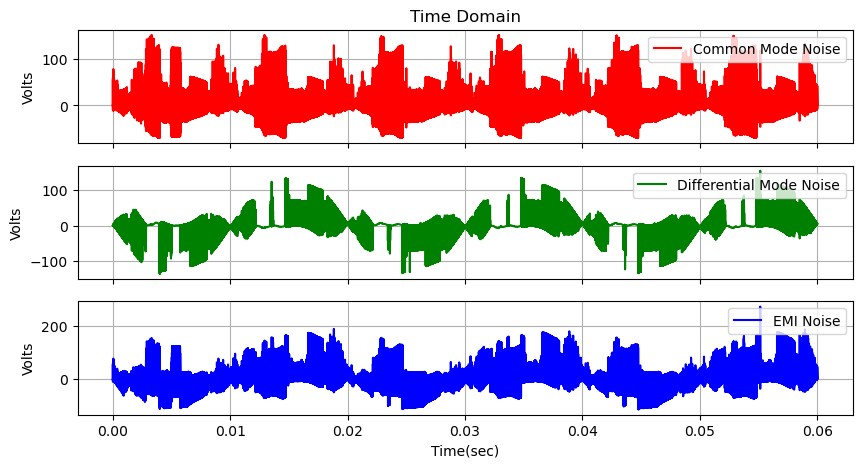

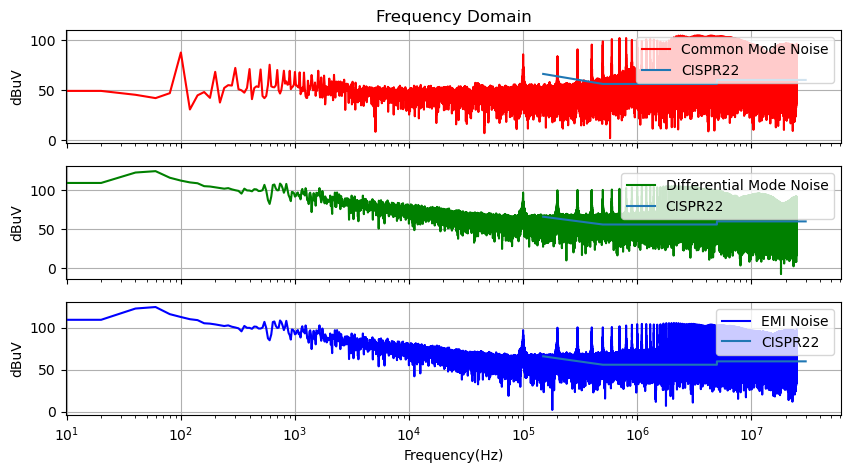

In [2]:
# 1. Open & Run SIMBA Project #
###############################
print('Load SIMBA File without Filter and run')
project = JsonProjectRepository(os.getcwd() + R"\Buck_EMI_Analysis.jsimba")
Buck = project.GetDesignByName('1.Buck_WithoutFilter')

job = Buck.TransientAnalysis.NewJob()
status = job.Run()
print (job.Summary())

# 2. Extract CM, DM & EMI noise #
#################################
print('Extracting CM, DM & EMI noises')
time= np.array(job.TimePoints)
CommonMode = np.array(job.GetSignalByName('CM - Out').DataPoints)
DifferentialMode = np.array(job.GetSignalByName('DM - Out').DataPoints)
EMI_Total = np.array(job.GetSignalByName('EMI - Out').DataPoints)

# 3. FFT Calculation #
######################
print('Perform FFT Calculations')
Ts = 2e-8
Fs = 1/Ts
tm = 10e-3
N = tm/Ts       # The number of samples for FFT calculation will be = Total Samples - N

CommonMode1 = CommonMode[int(N):]
DifferentialMode1 = DifferentialMode[int(N):]
EMI_Total1 = EMI_Total[int(N):]

n1 = len(CommonMode1)
n2 = len(DifferentialMode1)
n3 = len(EMI_Total1)

freq1 = np.fft.rfftfreq(n1, Ts)
freq2 = np.fft.rfftfreq(n2, Ts)
freq3 = np.fft.rfftfreq(n3, Ts)

CM_fft = np.fft.rfft(CommonMode1, norm="forward")   # perform FFT for real signals along with normalization
DM_fft = np.fft.rfft(DifferentialMode1, norm="forward")
EMI_fft = np.fft.rfft(EMI_Total1, norm="forward")

CM_fft_spect = np.abs(CM_fft)  # obtain the magnitude from complex FFT
DM_fft_spect = np.abs(DM_fft)
EMI_fft_spect = np.abs(EMI_fft)

CM_fft_dBuV = 20 * np.log10(CM_fft_spect/0.000001)   # scale the y-axis in dBuV
DM_fft_dBuV = 20 * np.log10(DM_fft_spect/0.000001)
EMI_fft_dBuV = 20 * np.log10(EMI_fft_spect/0.000001)

CISPR22_y = [66, 56, 56, 60, 60]    # Add CISPR-22 standards value in dBuV
CISPR22_x = [150000, 500000, 5000000, 5000010, 30000000]  # Frequency range for defining CISPR-22


# 4. Plot results without filter#
#################################
# Time domain
print('Plot EMI Noise without filter')
figa, ax = plt.subplots(3,1,sharex=True, figsize=(10, 5))
ax[0].plot(time, CommonMode, label='Common Mode Noise', color='red')
ax[0].grid(True)
ax[0].set_ylabel('Volts')
ax[1].plot(time, DifferentialMode, label='Differential Mode Noise', color='green')
ax[1].grid(True)
ax[1].set_ylabel('Volts')
ax[2].plot(time, EMI_Total, label='EMI Noise', color='blue')
ax[2].grid(True)
ax[2].set_ylabel('Volts')
ax[2].set_xlabel('Time(sec)')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
ax[0].set_title('Time Domain')

# Frequency domain
figb, bx = plt.subplots(3,1,sharex=True, figsize=(10, 5))
bx[0].semilogx(freq1, CM_fft_dBuV, label='Common Mode Noise', color='red')
bx[0].semilogx(CISPR22_x, CISPR22_y, label='CISPR22')
bx[0].grid(True)
bx[0].set_ylabel('dBuV')
bx[1].semilogx(freq2, DM_fft_dBuV, label='Differential Mode Noise', color='green')
bx[1].semilogx(CISPR22_x, CISPR22_y, label='CISPR22')
bx[1].grid(True)
bx[1].set_ylabel('dBuV')
bx[2].semilogx(freq3, EMI_fft_dBuV, label='EMI Noise', color='blue')
bx[2].semilogx(CISPR22_x, CISPR22_y, label='CISPR22')
bx[2].grid(True)
bx[2].set_ylabel('dBuV')
bx[2].set_xlabel('Frequency(Hz)')
bx[0].legend(loc='upper right')
bx[1].legend(loc='upper right')
bx[2].legend(loc='upper right')
bx[0].set_title('Frequency Domain')

We can clearly observe that without any EMI filter designed in the circuit, all the noises exceed the normalized values of the standard CISPR22 and therefore cannot pass the validation tests required by the norms.

**Section 2: EMI analysis with EMI filter**

Load SIMBA File with Filter and run
========== 0 Error(s), 0 Warning(s) ==========
Job duration: 110,2948524 seconds.

Extracting CM, DM & EMI noises
Perform FFT Calculations
Plot EMI Noise with filter


Text(0.5, 1.0, 'Frequency Domain')

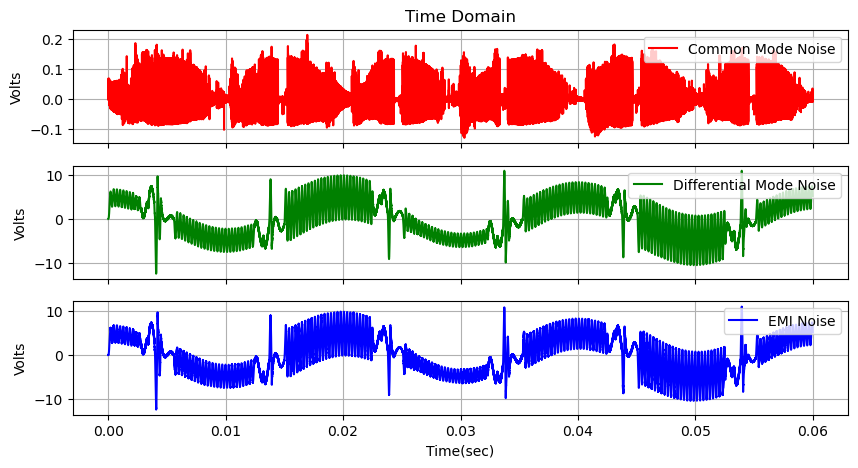

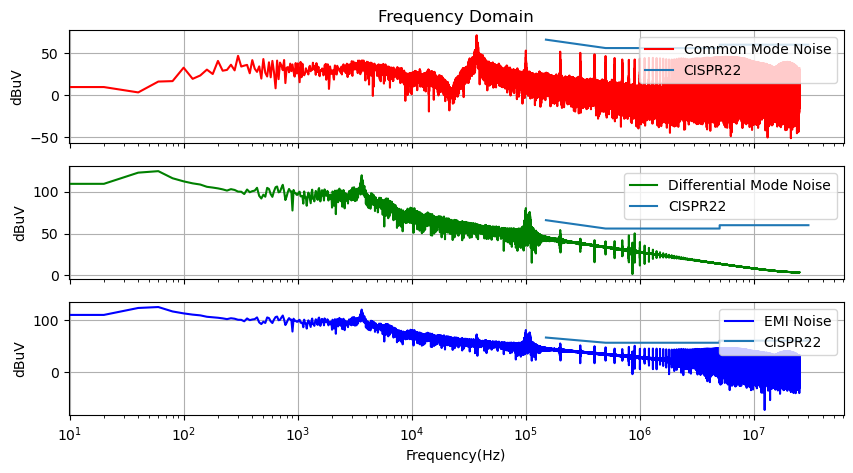

In [5]:
# 1. Open & Run SIMBA Project #
###############################
print('Load SIMBA File with Filter and run')
project = JsonProjectRepository(os.getcwd() + R"\Buck_EMI_Analysis.jsimba")
Buck = project.GetDesignByName('2.Buck_WithFilter')

job = Buck.TransientAnalysis.NewJob()
status = job.Run()
print (job.Summary())

# 2. Extract CM, DM & EMI noise #
#################################
print('Extracting CM, DM & EMI noises')
time= np.array(job.TimePoints)
CommonMode = np.array(job.GetSignalByName('CM - Out').DataPoints)
DifferentialMode = np.array(job.GetSignalByName('DM - Out').DataPoints)
EMI_Total = np.array(job.GetSignalByName('EMI - Out').DataPoints)

# 3. FFT Calculation #
######################
print('Perform FFT Calculations')
Ts = 2e-8
Fs = 1/Ts
tm = 10e-3
N = tm/Ts       # The number of samples for FFT calculation will be = Total Samples - N

CommonMode1 = CommonMode[int(N):]
DifferentialMode1 = DifferentialMode[int(N):]
EMI_Total1 = EMI_Total[int(N):]

n1 = len(CommonMode1)
n2 = len(DifferentialMode1)
n3 = len(EMI_Total1)

freq1 = np.fft.rfftfreq(n1, Ts)
freq2 = np.fft.rfftfreq(n2, Ts)
freq3 = np.fft.rfftfreq(n3, Ts)

CM_fft = np.fft.rfft(CommonMode1, norm="forward")   # perform FFT for real signals along with normalization
DM_fft = np.fft.rfft(DifferentialMode1, norm="forward")
EMI_fft = np.fft.rfft(EMI_Total1, norm="forward")

CM_fft_spect = np.abs(CM_fft)  # obtain the magnitude from complex FFT
DM_fft_spect = np.abs(DM_fft)
EMI_fft_spect = np.abs(EMI_fft)

CM_fft_dBuV = 20 * np.log10(CM_fft_spect/0.000001)   # scale the y-axis in dBuV
DM_fft_dBuV = 20 * np.log10(DM_fft_spect/0.000001)
EMI_fft_dBuV = 20 * np.log10(EMI_fft_spect/0.000001)

CISPR22_y = [66, 56, 56, 60, 60]    # Add CISPR-22 standards
CISPR22_x = [150000, 500000, 5000000, 5000010, 30000000]  # Frequency range for defining CISPR-22

# 4. Plot results without filter#
#################################
# Time domain
print('Plot EMI Noise with filter')
figa, ax = plt.subplots(3,1,sharex=True, figsize=(10, 5))
ax[0].plot(time, CommonMode, label='Common Mode Noise', color='red')
ax[0].grid(True)
ax[0].set_ylabel('Volts')
ax[1].plot(time, DifferentialMode, label='Differential Mode Noise', color='green')
ax[1].grid(True)
ax[1].set_ylabel('Volts')
ax[2].plot(time, EMI_Total, label='EMI Noise', color='blue')
ax[2].grid(True)
ax[2].set_ylabel('Volts')
ax[2].set_xlabel('Time(sec)')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
ax[0].set_title('Time Domain')

# Frequency domain
figb, bx = plt.subplots(3,1,sharex=True, figsize=(10, 5))
bx[0].semilogx(freq1, CM_fft_dBuV, label='Common Mode Noise', color='red')
bx[0].semilogx(CISPR22_x, CISPR22_y, label='CISPR22')
bx[0].grid(True)
bx[0].set_ylabel('dBuV')
bx[1].semilogx(freq2, DM_fft_dBuV, label='Differential Mode Noise', color='green')
bx[1].semilogx(CISPR22_x, CISPR22_y, label='CISPR22')
bx[1].grid(True)
bx[1].set_ylabel('dBuV')
bx[2].semilogx(freq3, EMI_fft_dBuV, label='EMI Noise', color='blue')
bx[2].semilogx(CISPR22_x, CISPR22_y, label='CISPR22')
bx[2].grid(True)
bx[2].set_ylabel('dBuV')
bx[2].set_xlabel('Frequency(Hz)')
bx[0].legend(loc='upper right')
bx[1].legend(loc='upper right')
bx[2].legend(loc='upper right')
bx[0].set_title('Frequency Domain')

We can clearly observe that with one EMI filter designed in the circuit, all the noises don't exceed the normalized values of the standard CISPR22 and are well below the standard. So the validation tests required by the norms are passed.